In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
import math
from scipy.stats import hypergeom
import scipy.stats as stats


In [ ]:
import pandas as pd
df = pd.read_csv("super market (1).csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
grossincome                False
Rating                     False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.rename(columns={'gross income': 'grossincome'}, inplace=True)

In [ ]:
df.grossincome.head()

0    26.1415
1     3.8200
2    16.2155
3    23.2880
4    30.2085
Name: grossincome, dtype: float64

In [ ]:
#@title performing estimation 

In [ ]:
df['grossincome'].count()

1000

In [ ]:
sample = df['grossincome'][0:100]
#sample count
n = sample.count()
n

100

In [ ]:
#sample mean
sampleMean = sample.mean()
sampleMean

17.44158499999999

In [ ]:
# sample variance
sampleVar = sample.var()
sampleVar

143.92089005583333

In [ ]:
# standred dev
std = math.sqrt(sampleVar)
std

11.996703299483293

In [ ]:
confIntterval = 0.95
alpha = 1 - confIntterval

In [ ]:
# std error
stdErr = std / math.sqrt(n)
print(stdErr)
# z score
z = abs(-2.0537)
z

1.1996703299483293


2.0537

In [ ]:
# upper limit
upperBound = sampleMean + (z * stdErr)
upperBound

19.905347956614875

In [ ]:
#lower limit
lowerBound = sampleMean - (z* stdErr)
lowerBound

14.977822043385105

In [ ]:
print("95% confidence interval of growth income lies bteween lowerlimit" , lowerBound , "and upperlimit ",upperBound)

95% confidence interval of growth income lies bteween lowerlimit 14.977822043385105 and upperlimit  19.905347956614875


In [ ]:
print("Q1 of Unit Price ---------------------------------------------------")
Q1= np.quantile(df['Unit price'],0.25)
print(Q1)
print("Q3 of Unit Price ---------------------------------------------------")
Q3= np.quantile(df['Unit price'],0.75)  
print(Q3)
print("IQR of Unit Price ---------------------------------------------------")
IQR = Q3 - Q1 
print(IQR)
print("Q2-Q1: ",Q2-Q1)
print("Q3-Q2: ",Q3-Q2)
print("Since (Q3-Q2) > (Q2-Q1) , then its right skewed ")

Q1 of Unit Price ---------------------------------------------------
32.875
Q3 of Unit Price ---------------------------------------------------
77.935
IQR of Unit Price ---------------------------------------------------
45.06
Q2-Q1:  22.355000000000004
Q3-Q2:  22.705
Since (Q3-Q2) > (Q2-Q1) , then its right skewed 


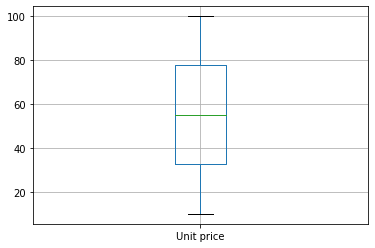

In [ ]:
df.boxplot(column=['Unit price'])

In [ ]:
#@title lvl 1

In [ ]:
print("median of Unit Price ---------------------------------------")
Q2 = df['Unit price'].median()
print(Q2)
print("mean of Unit Price -----------------------------------------")
mean=df['Unit price'].mean()
print(mean)
print("variance of unit priec---------------------------------------------------")
variance=df['Unit price'].var()
print(variance)


median of Unit Price ---------------------------------------
55.230000000000004
mean of Unit Price -----------------------------------------
55.67212999999998
variance of unit priec---------------------------------------------------
701.9653312943939


In [ ]:
print("mode of Ratings ------------------------------------------")
Ratingmode=df['Rating'].mode()
print(Ratingmode)
print("mode of Quantity ------------------------------------------")
Quantitymode=df['Quantity'].mode()
Quantitymode

mode of Ratings ------------------------------------------
0    6.0
dtype: float64
mode of Quantity ------------------------------------------


0    10
dtype: int64

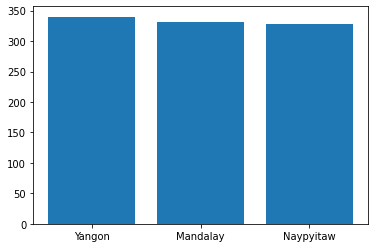

In [ ]:
#most profitable city
city = df.groupby('City').sum()
c = ['Yangon','Mandalay','Naypyitaw']
#ploting
plt.bar(c,df['City'].value_counts())
plt.show()

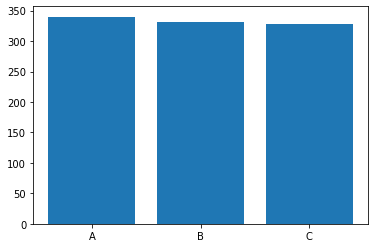

In [ ]:
#most profitable branch
branch = df.groupby('Branch').sum()
c = ['A','B','C']
#ploting
plt.bar(c,df['Branch'].value_counts())
plt.show()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


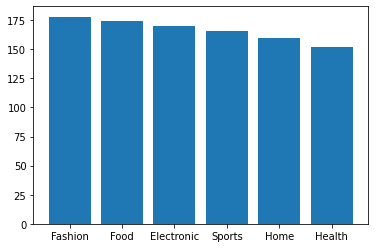

In [ ]:
#product line
# list of Product_line
l = ['Fashion','Food', 'Electronic', 'Sports', 'Home', 'Health']
print(df['Product line'].value_counts())
plt.bar(l,df['Product line'].value_counts())
plt.show()

number of normal custmers 499
number of member custmers 501


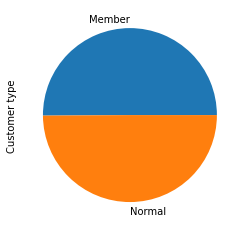

In [ ]:
df.groupby('Customer type')['Customer type'].count().plot(kind = 'pie')
print("number of normal custmers",df.City[df['Customer type'] == "Normal"].count())
print("number of member custmers",df.City[df['Customer type'] == "Member"].count())

number of cash payments 344
number of Ewallet payments 345
number of credit card payments 311


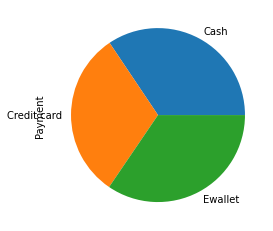

In [ ]:
df.groupby('Payment')['Payment'].count().plot(kind = 'pie')
print("number of cash payments",df.City[df['Payment'] == "Cash"].count())
print("number of Ewallet payments",df.City[df['Payment'] == "Ewallet"].count())
print("number of credit card payments",df.City[df['Payment'] == "Credit card"].count())

In [ ]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
#@title correlation and regression

In [ ]:
print("Correlation between Quantity and Gross Income-------------------------")
column_1 = df['Quantity']
column_2 = df['grossincome']
correlation = column_1.corr(column_2)
correlation

Correlation between Quantity and Gross Income-------------------------


0.7055101859433066

In [ ]:
import scipy.stats as stats

In [ ]:
# regression
col1 = df['Unit price']
col2 = df['grossincome']
m1 = col1.mean()
m2 = col2.mean()
std1 = np.sqrt(col1.var())
std2 = np.sqrt(col2.var())
z1 = stats.zscore(col1)
z2 = stats.zscore(col2)
r = np.sum(z1*z2)/999
b1 = r * (std2/std1)
b0 = m2 - (m1 * b1)

yhat = b0 + b1*(15.28)
print("y predicted")
print(yhat)

print("coefficient of determination")
coefOfdet = r*r
print(coefOfdet*100)



y predicted
4.0514520638911895
coefficient of determination
40.271295296118396


In [ ]:
#@title machine learning model

In [ ]:
r1 = df['Unit price']
r2 = df['grossincome']
r1_test = df['Unit price']
r2_test = df['grossincome']
r1 = r1.iloc[:800].values.reshape(800,1)
r2 = r2.iloc[:800].values.reshape(800,1)
r1_test = r1_test.iloc[:200].values.reshape(200,1)
r2_test = r2_test.iloc[:200].values.reshape(200,1)

print(r1_test.shape)


(200, 1)


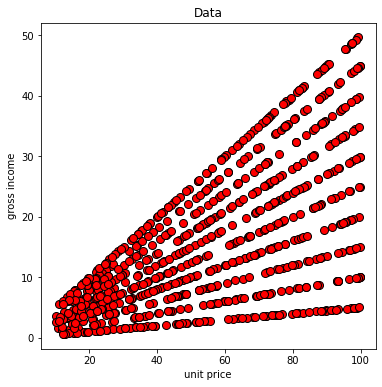

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(r1, r2, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('unit price')
plt.ylabel('gross income')
plt.grid(False)

In [ ]:
def Predictive_Line(r1, Theta):
    Predictions = None
    r1 = np.append(np.ones((1,r1.shape[0])), r1.reshape((1,r1.shape[0])), axis = 0)
    Predictions = np.dot(Theta.T , r1)
    Predictions = Predictions.T
    return Predictions

In [ ]:
def Calculate_Cost(r1, Theta, r2):
    m = r2.shape[0]
    J = 0
    hypothesis = Predictive_Line(r1, Theta)
    J = np.sum( np.power( ( hypothesis - r2 ) , 2 ) ) / (2 * m) 
    return J

In [ ]:
def Gradient_Descent(r1, r2, Theta, alpha, num_iters):

    m = r2.shape[0]  
    for i in range(num_iters):
      hypothesis = Predictive_Line(r1, Theta.reshape((2,1)))
      Theta = Theta - (alpha / m) * ( ( hypothesis - r2 ).T ).dot(r1)
    return Theta

In [ ]:
Theta = Gradient_Descent(r1, r2, Theta = np.array([0.1,0.4]).reshape((1,2)), alpha = 0.0001,num_iters= 10000)
P = Predictive_Line(r1, Theta.T)
Cost = Calculate_Cost(r1, Theta.T, r2)
print('Theta = ' + str(Theta))
print( 'Cost = '+str(Cost))

Theta = [[-0.0206553  0.2793447]]
Cost = 40.73499003849988


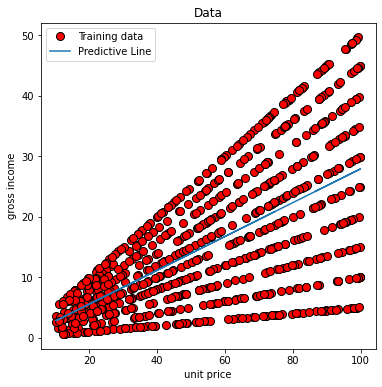

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(r1, r2, 'ro', ms=8, mec='k')
plt.title("Data")
plt.xlabel('unit price')
plt.ylabel('gross income')
plt.grid(False)
plt.plot(r1, P, '-')
plt.legend(['Training data', 'Predictive Line']);

In [ ]:
a = P = Predictive_Line(r1_test, Theta.T)
a
